In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('Bank_data.csv')
df.head()

,Age,Income,LoanAmount,CreditScore,LoanTerm,EmploymentType,MaritalStatus,Default
0,56,85994,50587,520,36,0,0,0
1,69,50432,124440,458,60,0,1,0
2,46,84208,129188,451,24,3,0,1
3,32,31713,44799,743,24,0,1,0
4,60,20437,9139,633,48,3,0,1


In [3]:
#separating x and y from dataset
X = df.drop('Default', axis = 1)
X.head()

,Age,Income,LoanAmount,CreditScore,LoanTerm,EmploymentType,MaritalStatus
0,56,85994,50587,520,36,0,0
1,69,50432,124440,458,60,0,1
2,46,84208,129188,451,24,3,0
3,32,31713,44799,743,24,0,1
4,60,20437,9139,633,48,3,0


In [4]:
y = df['Default']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Default, dtype: int64

In [5]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.25)

In [6]:
X_train.shape

(750, 7)

In [7]:
X_test.shape

(250, 7)

In [8]:
#importing RFC
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
#training the model
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
y_pre

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1])

In [10]:
model.score(X_test,y_test)

0.964

In [11]:
model.predict([[46,84208,129188,700,24,3,0]])

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy = accuracy_score(y_test, y_pre)
accuracy

0.964

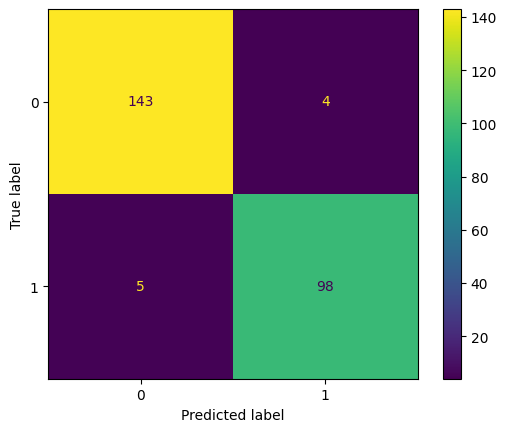

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pre)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       147\n           1       0.96      0.95      0.96       103\n\n    accuracy                           0.96       250\n   macro avg       0.96      0.96      0.96       250\nweighted avg       0.96      0.96      0.96       250\n'

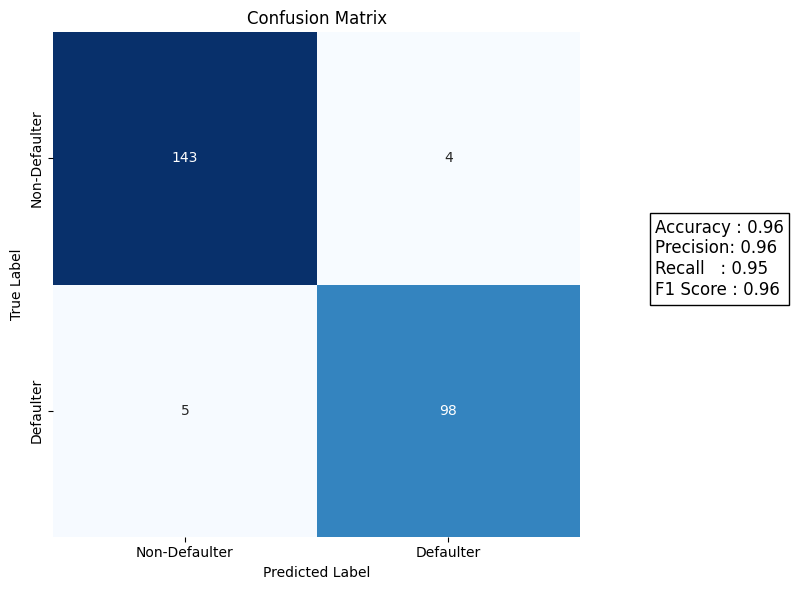

In [18]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: True and predicted labels (replace these with your model's output)
y_true = df['Default']             # Actual labels
y_pre = model.predict(X_test)     # Predicted labels

# Step 2: Calculate metrics
acc = accuracy_score(y_test, y_pre)
prec = precision_score(y_test, y_pre)
rec = recall_score(y_test, y_pre)
f1 = f1_score(y_test, y_pre)

# Step 3: Confusion matrix
cm = confusion_matrix(y_test, y_pre)

# Step 4: Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Defaulter', 'Defaulter'],
            yticklabels=['Non-Defaulter', 'Defaulter'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Step 5: Add metrics in a box
metrics_text = f"Accuracy : {acc:.2f}\nPrecision: {prec:.2f}\nRecall   : {rec:.2f}\nF1 Score : {f1:.2f}"
plt.gcf().text(1.1, 0.5, metrics_text, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


In [27]:
#model saving
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)